In [54]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
#from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [55]:
#get mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
x_train.shape

(60000, 28, 28)

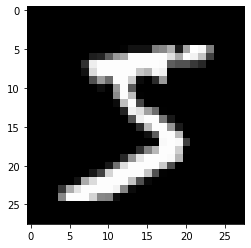

In [57]:
#Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] 
#instead of [0, 255]. It is always a good idea to normalize the input so that 
#each dimension has approximately the same scale

#convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize so the data is between 0 to 1
x_train /= 255.0
x_test /= 255.0

plt.gray()
plt.imshow(x_train[0])

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam


The input shape

What flows between layers are tensors. Tensors can be seen as matrices, with shapes.

In Keras, the input layer itself is not a layer, but a tensor. It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.

Example: if you have 30 images of 50x50 pixels in RGB (3 channels), the shape of your input data is (30,50,50,3). Then your input layer tensor, must have this shape (see details in the "shapes in keras" section).

https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

In [59]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))
x_train.shape

(60000, 784)

In [61]:
from keras.utils import to_categorical

# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [62]:
model = Sequential()
model.add(Dense(units = 50, activation='relu', input_shape=(784,)))
model.add(Dense(30,activation='relu'))
#model.add(Dense(20,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_24 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

BATCH_SIZE = 50
EPOCHS = 10

# Train model
hist = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0636 - acc: 0.9801 - val_loss: 0.1058 - val_acc: 0.9687
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0553 - acc: 0.9825 - val_loss: 0.1059 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0500 - acc: 0.9843 - val_loss: 0.1047 - val_acc: 0.9698
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0431 - acc: 0.9860 - val_loss: 0.0983 - val_acc: 0.9710
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0401 - acc: 0.9868 - val_loss: 0.0997 - val_acc: 0.9733
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0369 - acc: 0.9881 - val_loss: 0.1025 - val_acc: 0.9706
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0325 - acc: 0.9889 - val_loss: 0.1036 - val_acc

In [73]:
#history_dict = hist.history
#history_dict.keys()

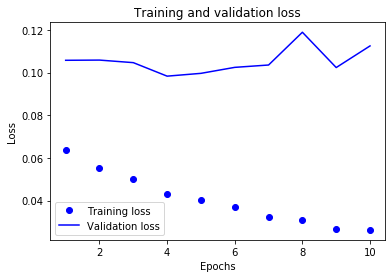

In [74]:
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

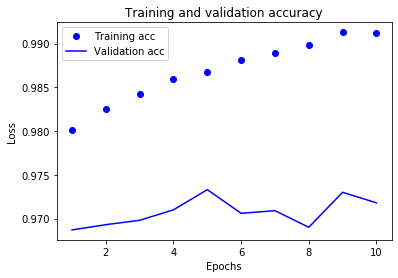

In [75]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11251807434874772
Test accuracy: 0.9718
